## Experiment Classifying documents with the Reuters Data-Set ##

See here: https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection  
and here: https://keras.io/datasets/  
for details about the data-set.

Example copied from posting here: http://hunterheidenreich.com/blog/keras-text-classification-part-1/  

See also https://arxiv.org/pdf/1502.01710v3.pdf  



## Import Keras Sample Data-Set - Reuters ##

In [42]:
import keras
from keras.datasets import reuters

In [43]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

print('# of Training Samples: {}'.format(len(x_train)))
print('# of Test Samples: {}'.format(len(x_test)))

num_classes = max(y_train) + 1
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 8982
# of Test Samples: 2246
# of Classes: 46


In [45]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

#### Define an index to lookup the classifications in the data-set ####

In [46]:
class_lookup={'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20, 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38, 'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4, 'pet-chem': 39, 'grain': 1, 'retail': 29}
class_rev_lookup = dict([(v, k) for k, v in class_lookup.items()])

word_rev_index = dict([(v, k) for k, v in word_index.items()])

In [47]:
class_lookup['copper']

6

In [48]:
class_rev_lookup[6]

'copper'

## Explore the Data ##
Take a look at the training data and y classification for a specefic item `i` :

In [49]:
text = []
i=200
for word in x_train[i]:
    text.append(word_rev_index[word])
print("CLASS: ", class_rev_lookup[y_train[i]])    
print(text)

CLASS:  jobs
['the', 'payable', 'interests', 'services', 'option', 'february', 'international', 'and', 'for', 'ltd', 'dlrs', 'new', 'is', 'a', 'dollar', 'in', '550', 'currency', 'in', 'three', 'prepared', 'resisted', 'option', 'near', 'month', 'at', 'record', 'ago', 'a', 'nutrition', 'prices', 'its', 'in', 'early', 'ltd', 'billion', 'also', 'is', 'a', 'only', 'in', 'going', '26', '3', 'manufacturer', 'way', 'mln', 'option', 'u', 'prices', 'its', 'billion', 'trade', 'is', 'for', '2', '11', 'turn', 'dollar', 'option', 'operation', 'from', '250', 'vs', 'produced', 'prices', 'its', 'from', 'directors', 'vs', 'a', 'only', '3', 'from', 'brazil', 'vs', 'for', '2', '11', 'expansionary', 'option', 'a', 'dollar', 'j', 'with', 'billion', 'also', 'is', 'stop', 'and', 'in', 'third', '550', 'subsidiary', 'agriculture', 'have', 'only', 'ltd', 'expansionary', 'arrranged', 'said', 'dlrs', 'from', 'is', 'u', 'agriculture', 'a', 'what', 'but', 'fault', 'option', 'a', 'dollar', 'j', 'with', 'dlrs', 'new',

So - we see a list of words associated with one of 46 classes of news.

## Tokenise the Text ##

Use the Keras `Tokenizer` (see https://keras.io/preprocessing/text/ ) to convert the text into a one-hot-encoded matrix
using `sequences_to_matrix`

In [50]:
from keras.preprocessing.text import Tokenizer

max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
len(x_train[0])

10000

## Build A Model ##

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(1024, input_shape=(max_words,), activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add()
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### Compile ####

In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.metrics_names)

['loss', 'acc']


In [81]:
batch_size = 32
epochs = 5

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)


Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 38s 5ms/step - loss: 1.2082 - acc: 0.7291 - val_loss: 0.9261 - val_acc: 0.8109
Epoch 2/5
8083/8083 [==============================] - 38s 5ms/step - loss: 0.4140 - acc: 0.9037 - val_loss: 0.9842 - val_acc: 0.7964
Epoch 3/5
8083/8083 [==============================] - 38s 5ms/step - loss: 0.2278 - acc: 0.9466 - val_loss: 0.9975 - val_acc: 0.7942
Epoch 4/5
8083/8083 [==============================] - 38s 5ms/step - loss: 0.1719 - acc: 0.9503 - val_loss: 1.0030 - val_acc: 0.8087
Epoch 5/5
2246/2246 [==============================] - 1s 568us/step


In [82]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0608673091457024
Test accuracy: 0.8032056990204809


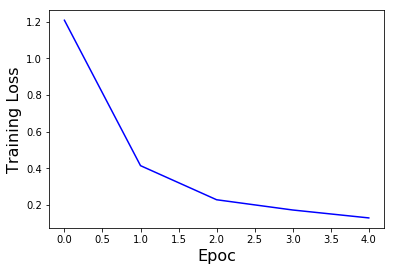

In [83]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],'b')
plt.xlabel("Epoc", fontsize=16)
plt.ylabel("Training Loss", fontsize=16)
plt.show()